# HAT-P-41

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

import astropy.units as u

In [3]:
name = 'HAT-P-41'

In [4]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))
fnames = np.sort(fnames)
obs = om.Observation.from_files(fnames)

In [5]:
obs

HAT-P-41 [2 Visits]

In [6]:
obs.fit_transit()

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

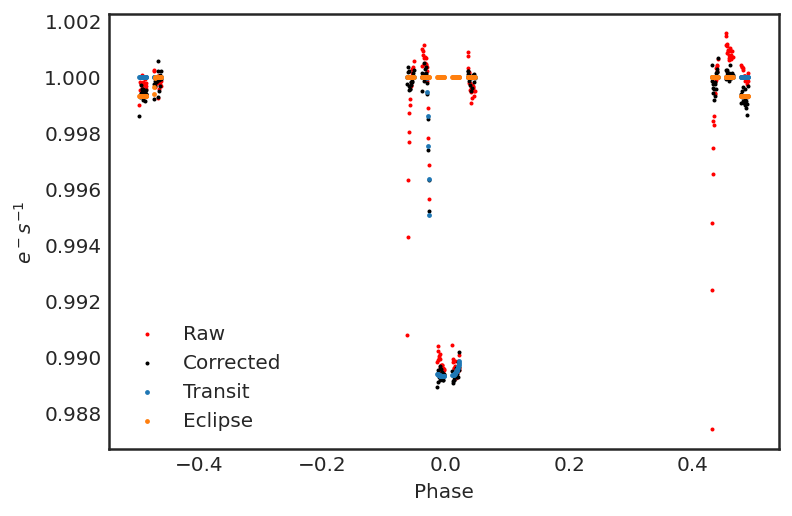

In [7]:
obs.plot()

In [8]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/2 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:  50%|█████     | 1/2 [00:11<00:11, 11.06s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 2/2 [00:23<00:00, 11.60s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 2/2 [00:23<00:00, 11.52s/it]

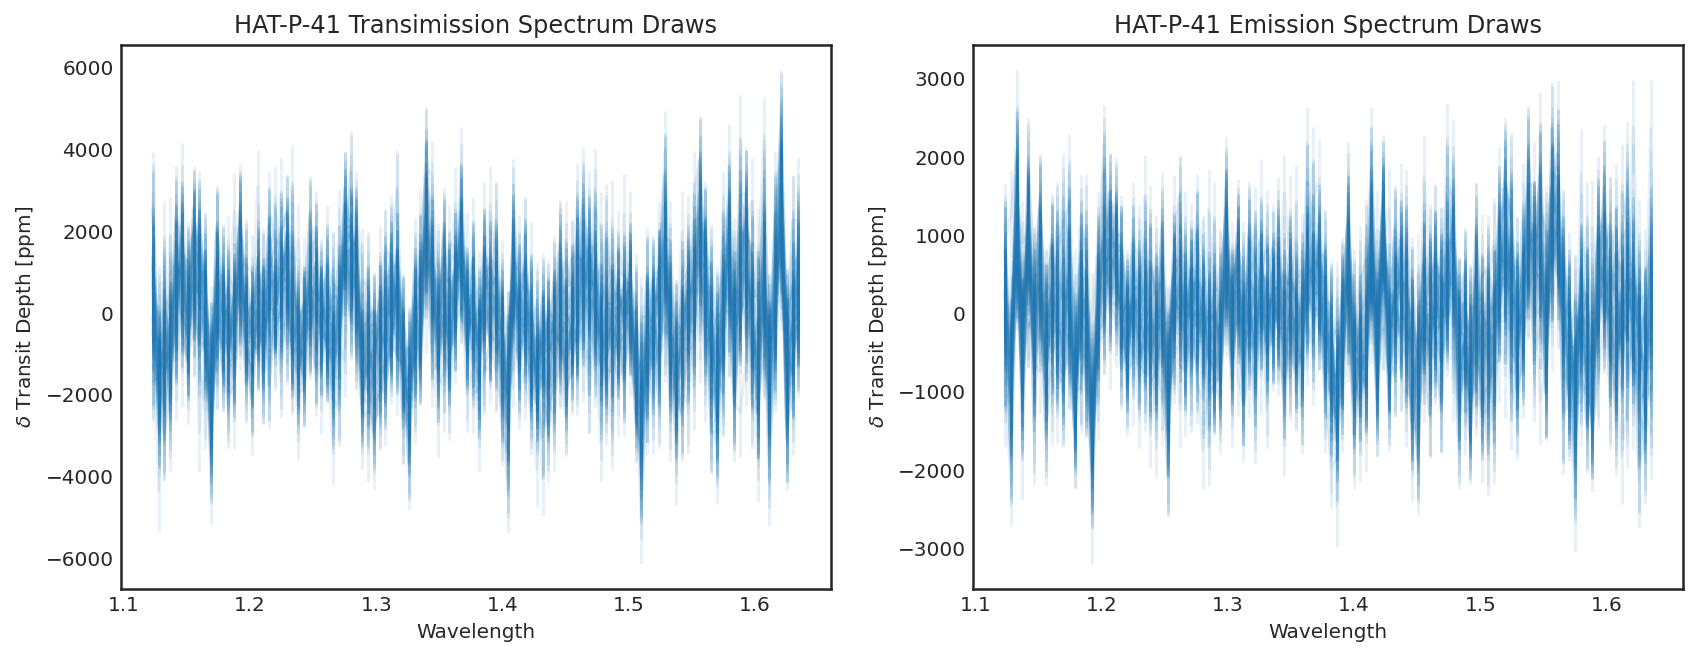

In [9]:
obs.plot_spectra()

/Users/ch/HST/projects/ombre/src/ombre/spec.py:92: RuntimeWarning: divide by zero encountered in true_divide
  y[idx] = np.average(self.spec[k], weights=1 / self.spec_err[k])
/Users/ch/Library/Caches/pypoetry/virtualenvs/ombre-vf38qw1p-py3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/ch/HST/projects/ombre/src/ombre/spec.py:94: RuntimeWarning: divide by zero encountered in true_divide
  (self.spec[k] - y[idx]) ** 2, weights=1 / self.spec_err[k]


<AxesSubplot:title={'center':'HAT-P-41 Transmission Spectrum, Visit: 1'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

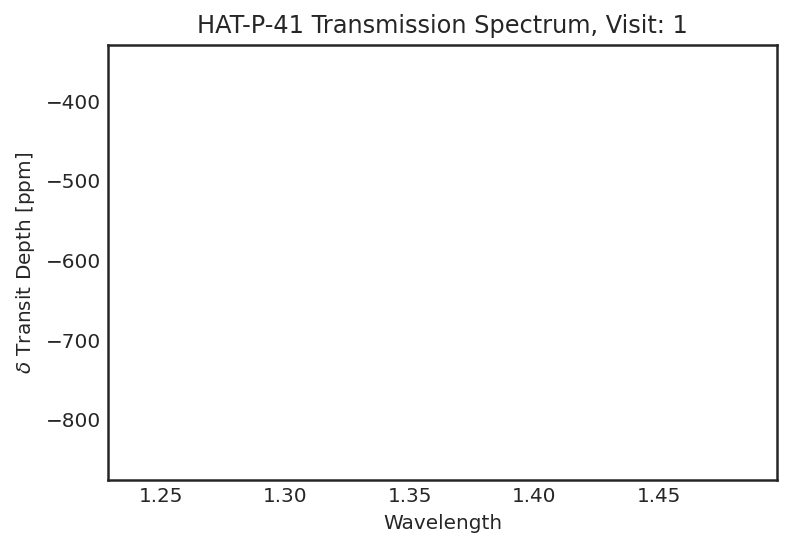

In [10]:
om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 200)).plot()

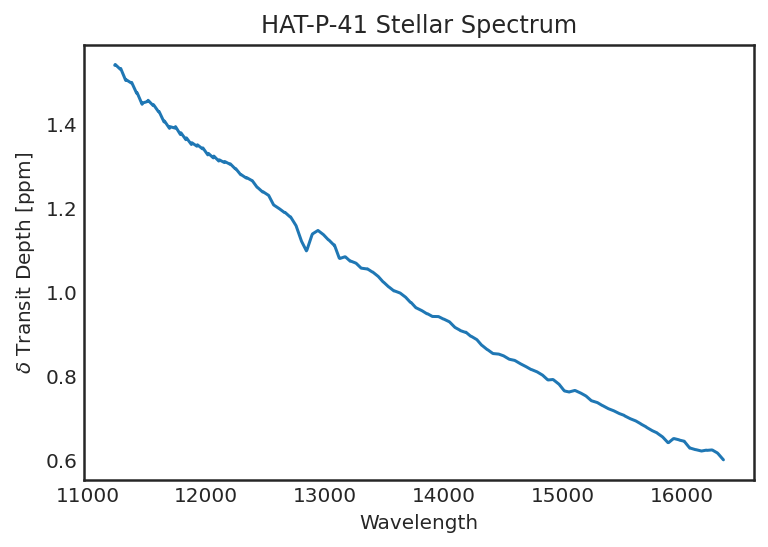

In [11]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [12]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

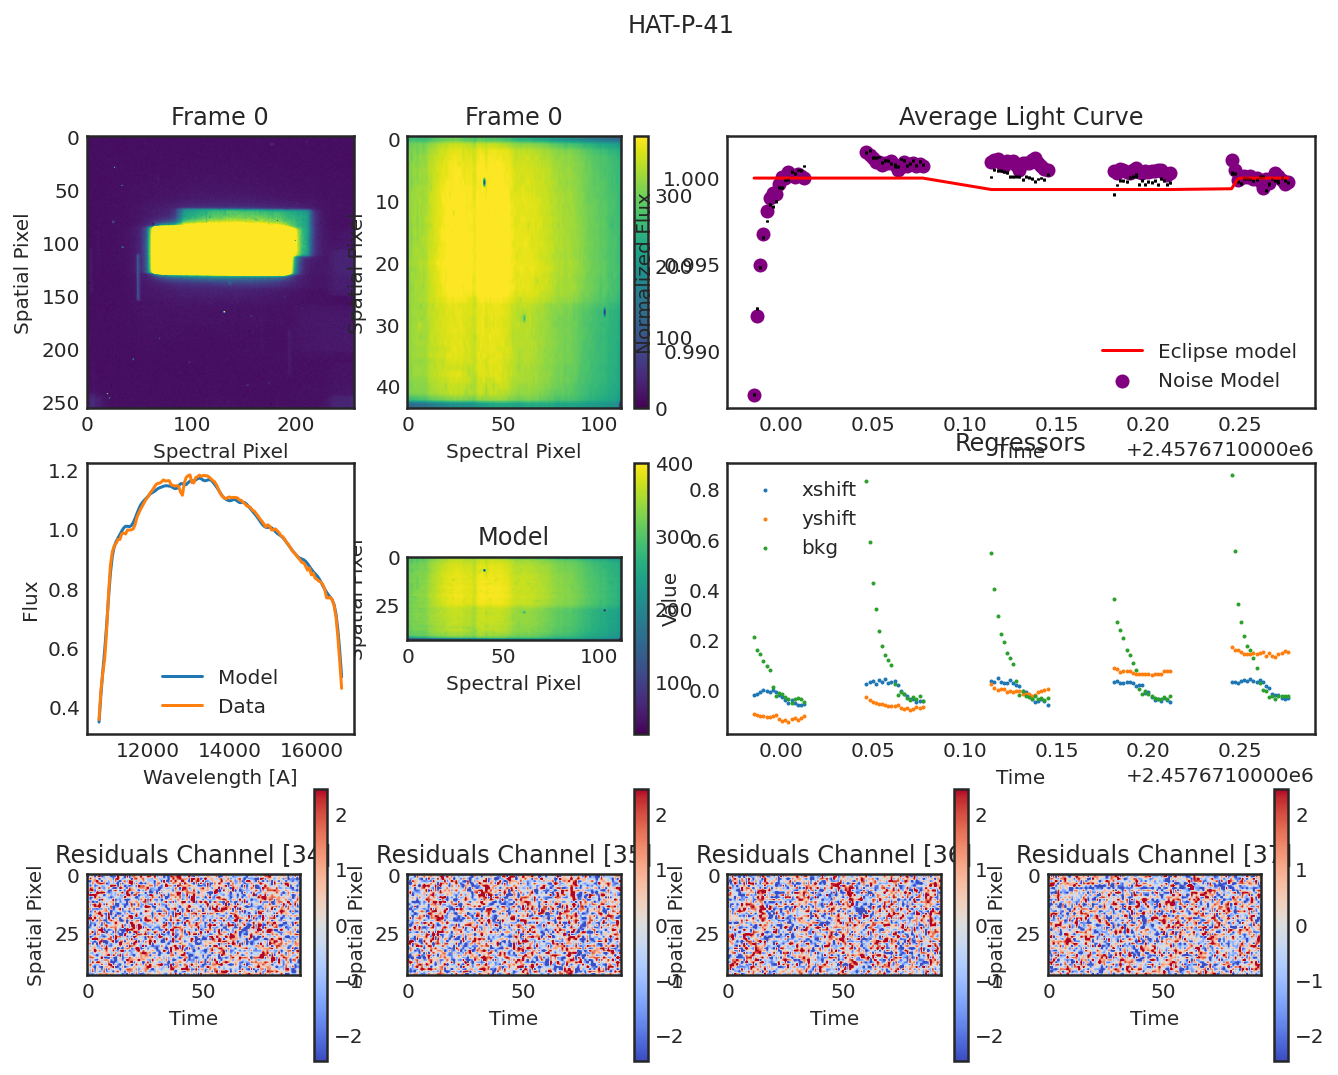

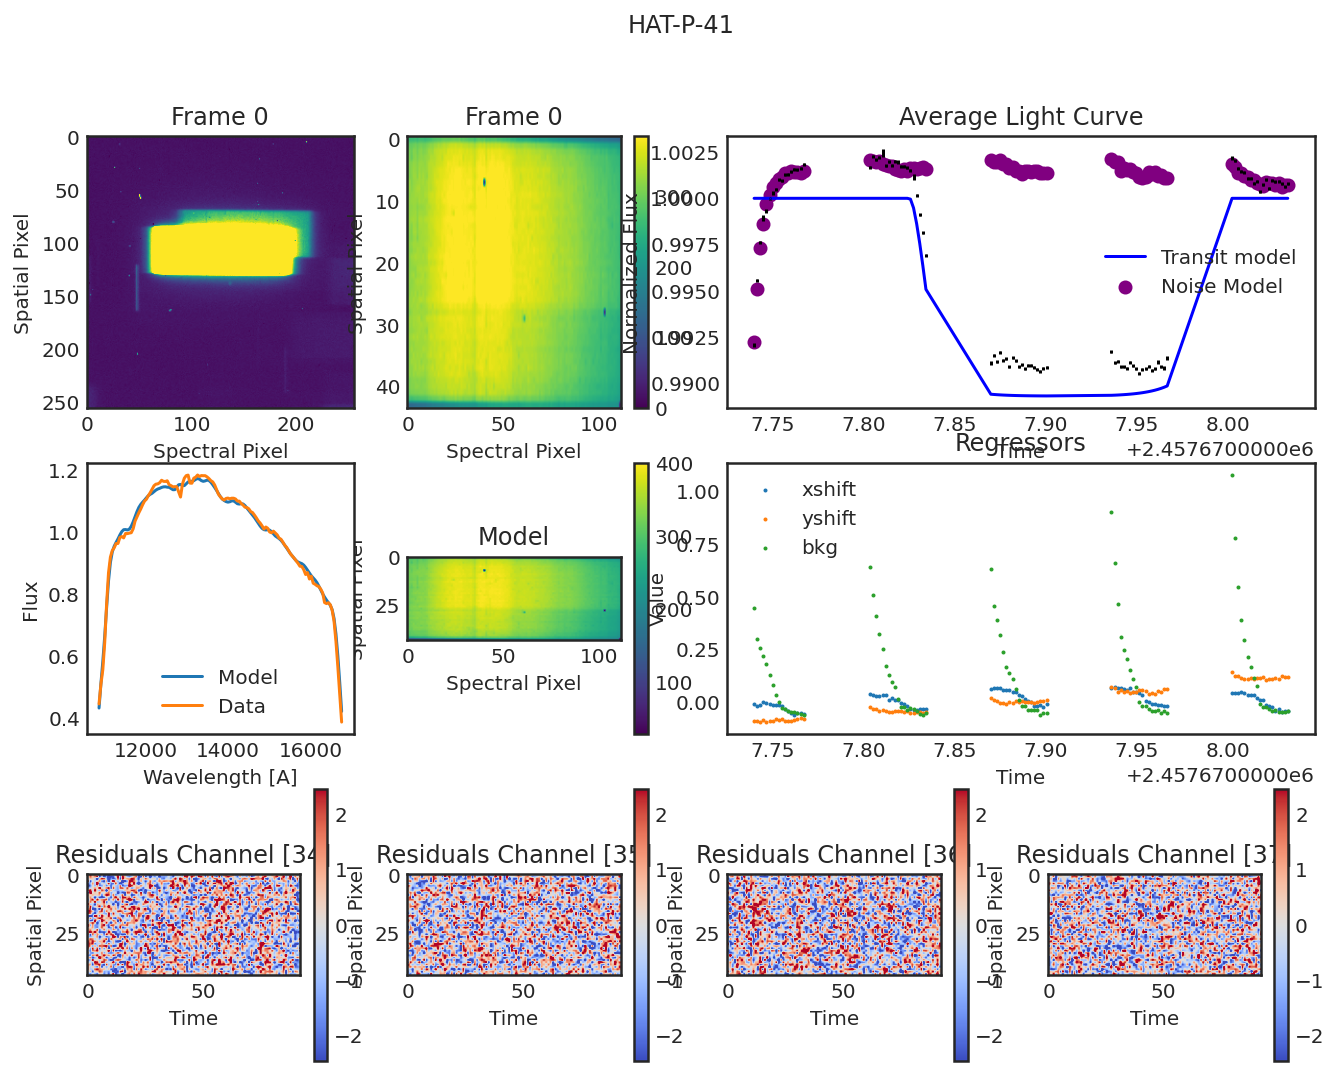

In [13]:
for visit in obs:
    visit.diagnose();
    plt.show();